In [65]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [63]:
directory_path = 'car_img/'
files = glob.glob(directory_path + '*.jpg')

columns = ['Make', 'Model', 'Year', 'MSRP', 'Front Wheel Size (in)', 'SAE Net Horsepower @ RPM',
           'Displacement', 'Engine Type', 'Width, Max w/o mirrors (in)', 'Height, Overall (in)',
           'Length, Overall (in)', 'Gas Mileage', 'Drivetrain', 'Passenger Capacity', 'Passenger Doors',
           'Body Style','Id']

dfs = []

# Iterate over the image paths
for image_path in files:
    file_name = os.path.basename(image_path)
    file_name = os.path.splitext(file_name)[0]

    # Extract values from the file name
    values = file_name.split('_')

    # Create a new DataFrame using the extracted values
    row = pd.DataFrame([values], columns=columns)
    row['Filepath'] = image_path
    # Append the DataFrame to the list
    dfs.append(row)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

In [ ]:
# -----Remove unwanted columns
# unwanted_columns = ['Make', 'Model', 'Year', 'MSRP', 'Front Wheel Size (in)', 'SAE Net Horsepower @ RPM',
#            'Displacement', 'Engine Type', 'Width, Max w/o mirrors (in)', 'Height, Overall (in)',
#            'Length, Overall (in)', 'Gas Mileage', 'Drivetrain', 'Passenger Capacity', 'Passenger Doors',
#            'Body Style','Id','Filepath']

# df = df.drop(unwanted_columns, axis=1)


In [64]:
# --------drop nan values

numeric_columns = ['Year', 'MSRP', 'Front Wheel Size (in)', 'SAE Net Horsepower @ RPM',
           'Displacement', 'Engine Type', 'Width, Max w/o mirrors (in)', 'Height, Overall (in)',
           'Length, Overall (in)', 'Gas Mileage','Passenger Capacity', 'Passenger Doors']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df.dropna(subset=numeric_columns, inplace=True)

df.reset_index(drop=True, inplace=True)
df


,Make,Model,Year,MSRP,Front Wheel Size (in),SAE Net Horsepower @ RPM,Displacement,Engine Type,"Width, Max w/o mirrors (in)","Height, Overall (in)","Length, Overall (in)",Gas Mileage,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Id,Filepath
0,Ford,Flex,2010,39.0,19.0,260.0,35.0,6.0,75.0,68.0,201.0,16.0,AWD,7.0,4.0,4dr,Zza,car_img/Ford_Flex_2010_39_19_260_35_6_75_68_20...
1,Nissan,Maxima,2011,31.0,18.0,290.0,35.0,6.0,73.0,57.0,190.0,19.0,FWD,5.0,4.0,4dr,Ytw,car_img/Nissan_Maxima_2011_31_18_290_35_6_73_5...
2,Dodge,Durango,2019,45.0,20.0,290.0,36.0,6.0,75.0,70.0,201.0,18.0,AWD,6.0,4.0,SUV,usz,car_img/Dodge_Durango_2019_45_20_290_36_6_75_7...
3,Lexus,IS,2019,41.0,17.0,260.0,35.0,6.0,71.0,56.0,184.0,19.0,AWD,5.0,4.0,4dr,syw,car_img/Lexus_IS_2019_41_17_260_35_6_71_56_184...
4,Jaguar,F-Type,2017,66.0,18.0,340.0,30.0,6.0,75.0,51.0,176.0,20.0,RWD,2.0,2.0,Convertible,TsC,car_img/Jaguar_F-Type_2017_66_18_340_30_6_75_5...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52265,Subaru,Forester,2016,29.0,18.0,250.0,20.0,4.0,70.0,68.0,180.0,23.0,AWD,5.0,4.0,SUV,KnV,car_img/Subaru_Forester_2016_29_18_250_20_4_70...
52266,GMC,Acadia,2011,45.0,20.0,280.0,36.0,6.0,78.0,69.0,200.0,16.0,AWD,7.0,4.0,SUV,tug,car_img/GMC_Acadia_2011_45_20_280_36_6_78_69_2...
52267,Porsche,718,2019,82.0,20.0,360.0,25.0,4.0,70.0,50.0,173.0,19.0,RWD,2.0,2.0,Convertible,YpY,car_img/Porsche_718_2019_82_20_360_25_4_70_50_...
52268,Subaru,Outback,2016,24.0,17.0,170.0,25.0,4.0,72.0,66.0,189.0,25.0,AWD,5.0,4.0,SUV,NAc,car_img/Subaru_Outback_2016_24_17_170_25_4_72_...


In [66]:
# -----Make train, valid csv

train_df, valid_df = train_test_split(df, test_size=1/5, random_state=42)
train_df.to_csv('train.csv', index=False)
valid_df.to_csv('valid.csv', index=False)

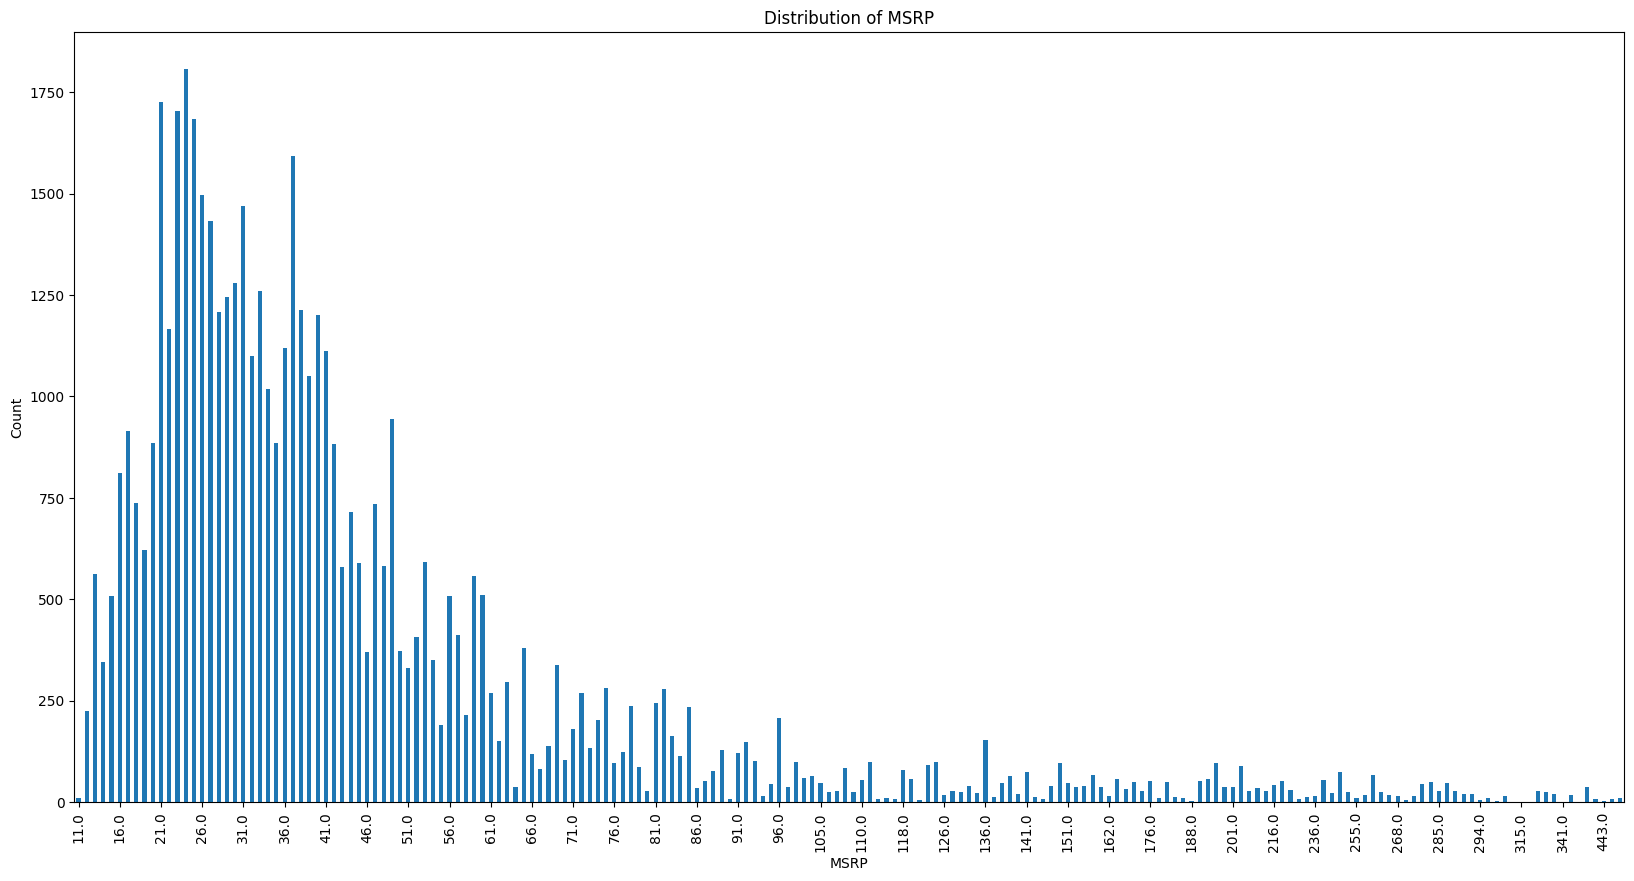

In [67]:
# Get the value counts of the 'MSRP' column and sort by index
msrp_counts = df['MSRP'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(20, 10))

# Plot the bar chart
msrp_counts.plot(kind='bar')

# Set the x-axis tick positions and labels
group_size = 5
filtered_xticks_positions = range(0, len(msrp_counts), group_size)
filtered_xticks_labels = msrp_counts.index[::group_size]
plt.xticks(filtered_xticks_positions, filtered_xticks_labels)

plt.xlabel('MSRP')
plt.ylabel('Count')
plt.title('Distribution of MSRP')
plt.show()
